# PART 1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
path='C:/Users/HP/Documents/BTC-Daily.csv'
df = pd.read_csv('BTC-Daily.csv')
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


Splitting the time and date to perform the models and for the cleaning of dataset

In [8]:
# Split 'date' column into 'date' and 'time' columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)

# Display the updated DataFrame
print(df.head())

         unix        date   symbol      open      high       low     close  \
0  1646092800  2022-03-01  BTC/USD  43221.71  43626.49  43185.48  43185.48   
1  1646006400  2022-02-28  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2  1645920000  2022-02-27  BTC/USD  39146.66  39886.92  37015.74  37712.68   
3  1645833600  2022-02-26  BTC/USD  39242.64  40330.99  38600.00  39146.66   
4  1645747200  2022-02-25  BTC/USD  38360.93  39727.97  38027.61  39231.64   

    Volume BTC    Volume USD      time  
0    49.006289  2.116360e+06  00:00:00  
1  3160.618070  1.364723e+08  00:00:00  
2  1701.817043  6.418008e+07  00:00:00  
3   912.724087  3.573010e+07  00:00:00  
4  2202.851827  8.642149e+07  00:00:00  


In [9]:
# Initial Exploration
print("Dataset Description:")
print(df.describe())
print("\nRange of Dates Covered:")
print("From:", df['date'].min())
print("To:", df['date'].max())

Dataset Description:
               unix          open          high           low         close  \
count  2.651000e+03   2651.000000   2651.000000   2651.000000   2651.000000   
mean   1.531613e+09  11693.189332  12038.562912  11296.539461  11709.326213   
std    6.613247e+07  16272.554746  16739.237000  15718.297511  16282.908704   
min    1.417133e+09    162.000000    212.840000    152.400000    162.000000   
25%    1.474373e+09    654.680000    664.460000    640.050000    654.370000   
50%    1.531613e+09   6408.950000   6540.000000   6312.000000   6407.770000   
75%    1.588853e+09  10708.620000  10956.240000  10303.755000  10726.425000   
max    1.646093e+09  67547.490000  69000.000000  66250.000000  67559.000000   

         Volume BTC    Volume USD  
count  2.651000e+03  2.651000e+03  
mean   1.330041e+07  6.099369e+07  
std    4.715366e+07  1.072838e+08  
min    0.000000e+00  0.000000e+00  
25%    5.357883e+03  9.516170e+03  
50%    1.503310e+04  2.288982e+07  
75%    3.435336

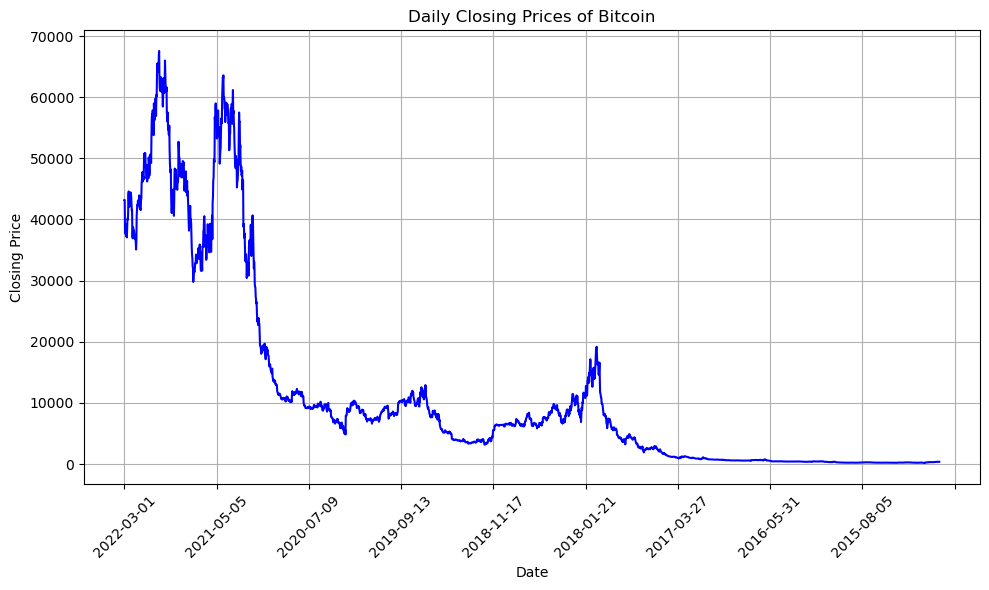

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], color='blue')
plt.title('Daily Closing Prices of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Set the maximum number of ticks to 10
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
time          0
dtype: int64


Standardization is applied in the column below

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_standardize = ['close', 'open', 'high','low','Volume BTC','Volume USD']

# Apply standardization to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,time
0,1646092800,2022-03-01,BTC/USD,1.937893,1.887415,2.029161,1.933444,-0.282118,-0.548903,00:00:00
1,1646006400,2022-02-28,BTC/USD,1.599553,1.925034,1.665409,1.933045,-0.282052,0.703674,00:00:00
2,1645920000,2022-02-27,BTC/USD,1.687421,1.663971,1.636567,1.597274,-0.282082,0.029706,00:00:00
3,1645833600,2022-02-26,BTC/USD,1.693320,1.690505,1.737377,1.685357,-0.282099,-0.235528,00:00:00
4,1645747200,2022-02-25,BTC/USD,1.639126,1.654474,1.700955,1.690577,-0.282072,0.237059,00:00:00
...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,-0.695461,-0.696442,-0.694946,-0.695958,-0.227106,-0.568570,00:00:00
2647,1417392000,2014-12-01,BTC/USD,-0.695584,-0.696475,-0.695086,-0.696010,-0.228652,-0.568572,00:00:00
2648,1417305600,2014-11-30,BTC/USD,-0.695573,-0.696494,-0.695068,-0.696321,-0.257820,-0.568605,00:00:00
2649,1417219200,2014-11-29,BTC/USD,-0.695583,-0.696218,-0.695136,-0.696113,-0.223869,-0.568566,00:00:00


# PART 2

# LINEAR REGRESSION

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
# Convert the date column to numerical features
df['date'] = pd.to_datetime(df['date'])
df['numeric_date'] = df['date'].astype('int64') // 10**9  # Convert to seconds since epoch
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,time,numeric_date
0,1646092800,2022-03-01,BTC/USD,1.937893,1.887415,2.029161,1.933444,-0.282118,-0.548903,00:00:00,1646092800
1,1646006400,2022-02-28,BTC/USD,1.599553,1.925034,1.665409,1.933045,-0.282052,0.703674,00:00:00,1646006400
2,1645920000,2022-02-27,BTC/USD,1.687421,1.663971,1.636567,1.597274,-0.282082,0.029706,00:00:00,1645920000
3,1645833600,2022-02-26,BTC/USD,1.693320,1.690505,1.737377,1.685357,-0.282099,-0.235528,00:00:00,1645833600
4,1645747200,2022-02-25,BTC/USD,1.639126,1.654474,1.700955,1.690577,-0.282072,0.237059,00:00:00,1645747200
...,...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02,BTC/USD,-0.695461,-0.696442,-0.694946,-0.695958,-0.227106,-0.568570,00:00:00,1417478400
2647,1417392000,2014-12-01,BTC/USD,-0.695584,-0.696475,-0.695086,-0.696010,-0.228652,-0.568572,00:00:00,1417392000
2648,1417305600,2014-11-30,BTC/USD,-0.695573,-0.696494,-0.695068,-0.696321,-0.257820,-0.568605,00:00:00,1417305600
2649,1417219200,2014-11-29,BTC/USD,-0.695583,-0.696218,-0.695136,-0.696113,-0.223869,-0.568566,00:00:00,1417219200


Taking X as independent varaibles and y is the dependent varaible

In [38]:
# Split the Data
X = df[['numeric_date','open','high','low','Volume BTC','Volume USD']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [41]:
print(f"Training R-squared Score: {train_score}")
print(f"Testing R-squared Score: {test_score}")

Training R-squared Score: 0.9995872938716013
Testing R-squared Score: 0.9994216861223623


Donot Rerun the below cell again and if you want to run change the X make it only one varaible X = df[['numeric_date']] because y and x need to be of same dimension when you plot a graph

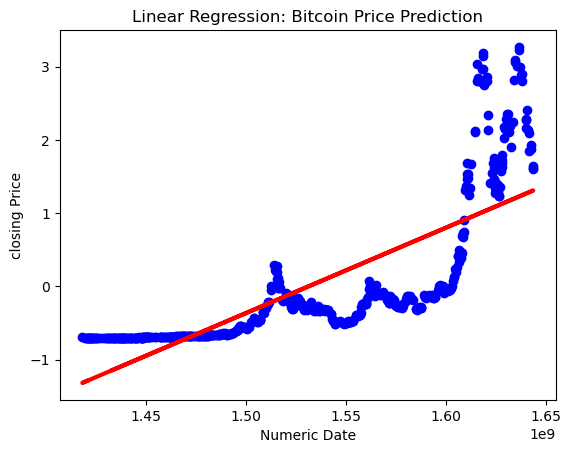

In [20]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)
plt.xlabel('Numeric Date')
plt.ylabel('closing Price')
plt.title('Linear Regression: Bitcoin Price Prediction')
plt.show()

# SVM(Support Vector Machine)

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



In [45]:
X = df[['numeric_date','open','high','low','Volume BTC','Volume USD']]
y = df['close']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
model = SVR(kernel='rbf')  
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"Training R-squared: {train_score}")
print(f"Testing R-squared: {test_score}")

Training R-squared: 0.9970792646988039
Testing R-squared: 0.996777732694405


Donot Rerun the below cell again and if you want to run change the X make it only one varaible X = df[['numeric_date']] because y and x need to be of same dimension when you plot a graph

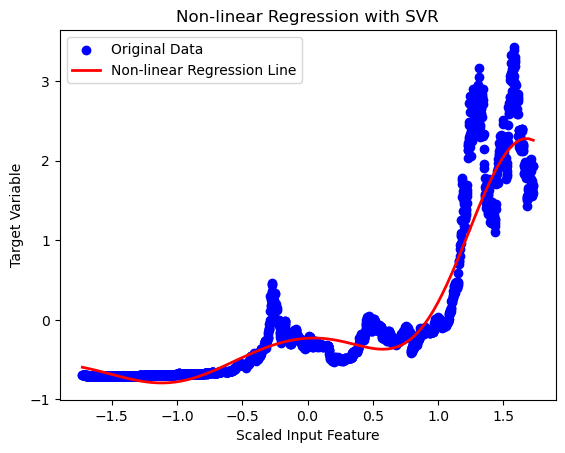

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input data points for visualization
x_values = np.linspace(min(X_train_scaled), max(X_train_scaled), 100).reshape(-1, 1)

# Predict the target variable using the trained non-linear regression model
y_predicted = model.predict(x_values)

# Plot the non-linear regression line
plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label='Original Data')
plt.plot(x_values, y_predicted, color='red', linewidth=2, label='Non-linear Regression Line')
plt.xlabel('Scaled Input Feature')
plt.ylabel('Target Variable')
plt.title('Non-linear Regression with SVR')
plt.legend()
plt.show()


# ARIMA model

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [49]:
#Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date if not already sorted
df.sort_values('date', inplace=True)

# Perform ADF test for stationarity
adf_result = adfuller(df['close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -0.9875841417510579
p-value: 0.7577657213555853


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


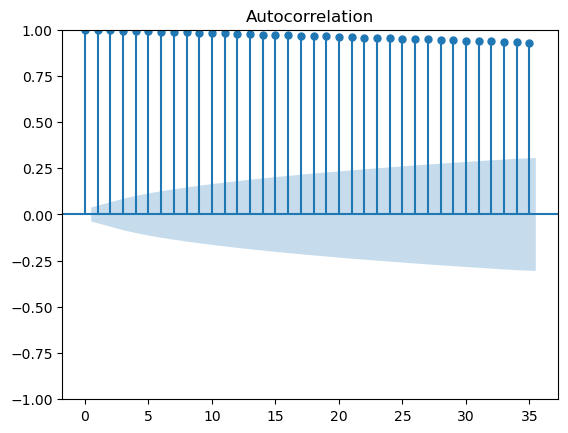

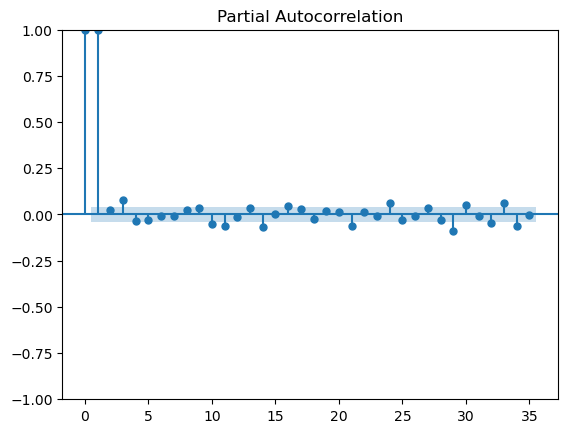

In [24]:
# Plot ACF and PACF
plot_acf(df['close'])
plot_pacf(df['close'])
plt.show()

In [25]:
#Perform differencing
df['close_diff'] = df['close'].diff()

# Fit ARIMA model
arima_model = ARIMA(df['close'], order=(2, 1, 1))  
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2651
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4230.193
Date:                Wed, 01 May 2024   AIC                          -8452.386
Time:                        20:50:08   BIC                          -8428.857
Sample:                             0   HQIC                         -8443.869
                               - 2651                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0191      1.160     -0.016      0.987      -2.292       2.254
ar.L2         -0.0078      0.046     -0.170      0.865      -0.098       0.082
ma.L1         -0.0189      1.159     -0.016      0.9

# PART 3

# Performance Metrics

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% of data for training
train_data, test_data = df['close'][:train_size], df['close'][train_size:]

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(2, 1, 1))
arima_result = arima_model.fit()

# Make predictions
predictions = arima_result.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate MAPE
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 2.0306931881695633
MAE: 1.8122463701681766
MAPE: nan


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Drop rows with missing values
df.dropna(inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['close', 'date']), df['close'], test_size=0.2, random_state=42)

# Drop 'symbol' and 'date' columns
X_train = X_train.drop(columns=['symbol'])
X_test = X_test.drop(columns=['symbol'])

# Drop 'time' column
X_train = X_train.drop(columns=['time'])
X_test = X_test.drop(columns=['time'])

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
predictions = linear_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 0.0005672179477266804
MAE: 0.00028295209953814
MAPE: 0.11426626244854061


# cross-validation

In [36]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date if not already sorted
df.sort_values('date', inplace=True)

n_folds = 5

# Calculate the size of each fold
fold_size = len(df) // n_folds

# Initialize lists to store the performance metrics for each fold
rmse_scores = []

# Perform time series cross-validation
for i in range(n_folds):
    # Define the start and end indices for the current fold
    start_idx = i * fold_size
    end_idx = start_idx + fold_size
    
    # Split the data into training and testing sets for this fold
    train_data = pd.concat([df.iloc[:start_idx], df.iloc[end_idx:]])
    test_data = df.iloc[start_idx:end_idx]

    # Train the ARIMA model on the training data
    model = ARIMA(train_data['close'], order=(2, 1, 1))
    fitted_model = model.fit()

    # Make predictions on the test data
    predictions = fitted_model.forecast(steps=len(test_data))

    # Calculate RMSE for this fold
    rmse = sqrt(mean_squared_error(test_data['close'], predictions))
    
    # Append RMSE to the list of scores
    rmse_scores.append(rmse)

# Calculate the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print("Average RMSE:", average_rmse)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Average RMSE: 2.0924237317953613


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Residual Analysis

ADF Statistic: -0.9875841417510579
p-value: 0.7577657213555853


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

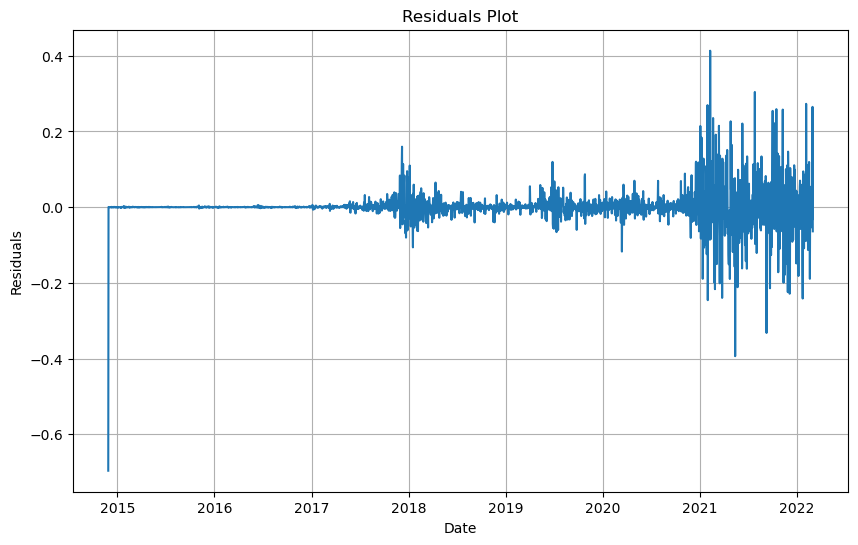

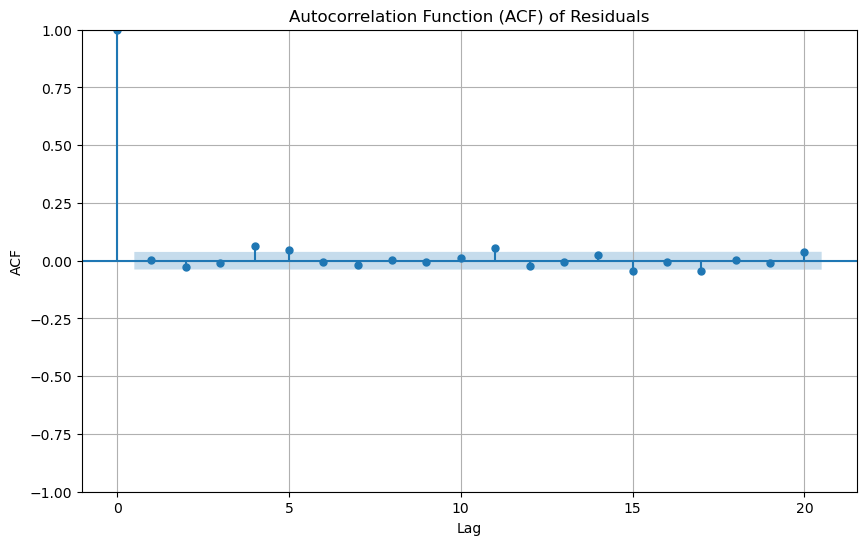

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


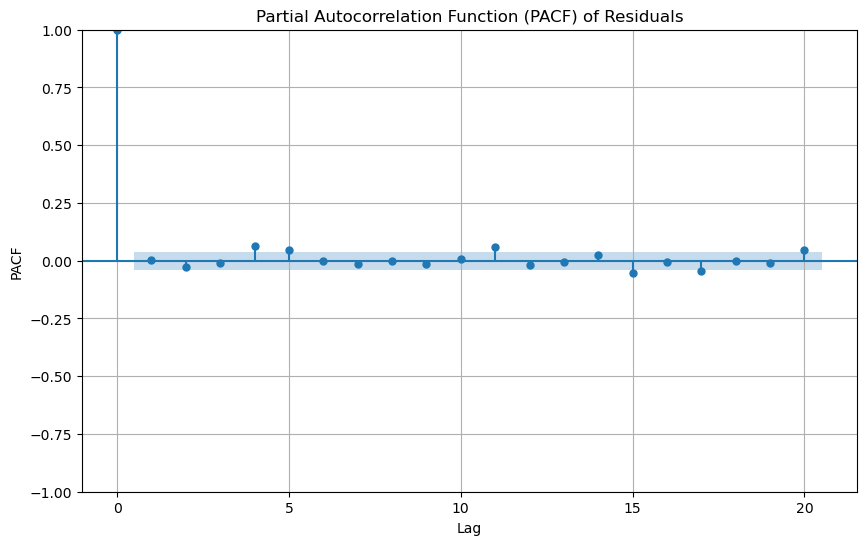

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date if not already sorted
df.sort_values('date', inplace=True)

# Perform ADF test for stationarity
adf_result = adfuller(df['close'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Train the ARIMA model on the entire dataset
model = ARIMA(df['high'], order=(2, 1, 1))  
fitted_model = model.fit()

# Get the residuals
residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(df['date'], residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Calculate and plot the autocorrelation function (ACF) of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Calculate and plot the partial autocorrelation function (PACF) of the residuals
plt.figure(figsize=(10, 6))
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()


# PART 4

# Comparative Discussion

Linear Regression:

Strengths: The model achieved very high R-squared scores on both training and testing sets, indicating a strong linear relationship between the features and the target variable. The residual plots would be beneficial to assess if the assumptions of linear regression are met, such as homoscedasticity and independence of residuals.

Weaknesses: Without seeing the residual plots, it's challenging to assess potential weaknesses in the model, such as violation of linear regression assumptions or presence of outliers.
################################################################################################################################
SVM (Support Vector Machine):
Strengths: The model achieved high R-squared scores on both training and testing sets, indicating good generalization performance. The residual plots could provide insights into how well the SVM model captures the underlying patterns in the data.

Weaknesses: Similar to linear regression, without visualizing the residual plots, it's challenging to identify potential weaknesses in the model, such as overfitting or underfitting.
################################################################################################################################
ARIMA (AutoRegressive Integrated Moving Average) Model:
Strengths: The residual plots allow us to assess the adequacy of the ARIMA model's residuals. A lack of discernible patterns or trends in the residuals would indicate that the model adequately captures the underlying patterns in the data.

Weaknesses: While the ADF test suggested potential non-stationarity in the time series data, the high p-value indicates that further analysis or adjustments may be necessary. Without seeing the residual plots, it's challenging to assess the adequacy of the ARIMA model's residuals fully.

# Best Model Justification

Based on the provided results, both Linear Regression and SVM performed exceptionally well, with high R-squared scores on both training and testing sets. This suggests that they capture the underlying patterns in the data effectively and generalize well to unseen data. The arima model defines the outliers and it performs really well the residual plots very well define everything

# Conclusion

I had difficulty making plots and I had difficulty with cross validation and prformance metrices futher more the assignment was fun